# 환경변수 설정
- python-dotenv 라이브러리 설치

In [1]:
!pip install python-dotenv openai --q


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# 파일 가져오기

In [14]:
import os
from pathlib import Path
from dotenv import load_dotenv

def load_env_from_project_root():
    """
    현재 실행 중인 스크립트(LLM_basic.ipynb)에서
    step10_LLM 디렉토리의 .env 파일을 로드
    """
    # 현재 파일 위치
    current_path = Path.cwd()
    
    # step10_LLM 디렉토리로 이동 (../../)
    project_root = current_path.parent.parent
    
    # .env 파일 경로
    env_path = project_root / '.env'
    
    # .env 파일이 존재하는지 확인
    if env_path.exists():
        load_dotenv(env_path)
        print(f"Loaded .env from: {env_path}")
        return True
    else:
        raise FileNotFoundError(f".env file not found at: {env_path}")

# 실행
try:
    load_env_from_project_root()
    
    # 환경 변수 사용
    api_key = os.getenv('OPENAI_API_KEY')
    if api_key:
        print("API Key loaded successfully")
        # API 키 마스킹하여 출력
        masked_key = f"{api_key[:8]}...{api_key[-4:]}"
        print(f"API Key: {masked_key}")
    else:
        print("API Key not found in .env file")
except Exception as e:
    print(f"Error loading .env file: {e}")

Loaded .env from: C:\Users\campus3S043\Desktop\alpaco_lectures\step10_LLM\.env
API Key loaded successfully
API Key: sk-proj-...yTUA


# 실습

## Hello, World

In [15]:
from openai import OpenAI

client = OpenAI(
    # 시스템에 설정된 API 키를 사용합니다
    api_key=os.environ.get('OPENAI_API_KEY')
)

# OpenAI API를 활용하며, GPT-4o의 최신 모델을 호출합니다
response = client.chat.completions.create(model='gpt-4o',
messages=[
      {'role': 'user', 'content': '안녕!'}
  ])

# 응답을 추출합니다
print(response.choices[0].message.content)

안녕하세요! 어떻게 도와드릴까요?


# 뉴스기사 생성

In [3]:
from openai import OpenAI
from typing import List

prompt_role = '''당신은 기자를 도와주는 어시스턴트입니다.
당신의 임무는 주어진 사실을 기반으로 기사(FACTS)를 쓰는 것입니다.
다음 지시 사항을 준수해야 합니다. TONE, LENGTH, STYLE'''

def ask_chatGPT (messages):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
        )
    
    return response.choices[0].message.content

def assist_journalist(
    facts: List[str], tone: str, length_words: int, style: str
):
    facts = ", ".join(facts)
    prompt = f"{prompt_role} \
        FACTS: {facts} \
        TONE: {tone} \
        LENGTH: {length_words} 단어 \
        STYLE: {style}"
    return ask_chatGPT ([{"role": "user", "content": prompt}])


print(
    assist_journalist(
        ["미국 증시가 하락했습니다.", "트럼프의 중국 관세 부과 위협이 원인입니다."], 
        "심각", 
        100, 
        "경제뉴스"
    )
)

print(
    assist_journalist(
        facts=[
            "트럼프가 중국에 대한 관세를 60%까지 인상하겠다고 발표했습니다.",
            "이는 현재 25% 수준에서 크게 상승하는 것입니다.",
            "중국 정부는 이에 대한 보복 조치를 경고했습니다.",
        ],
        tone="분석적",
        length_words=50,
        style="금융뉴스",
    )
)

미국 증시가 최근 하락세를 보였습니다. 이번 하락의 주요 원인은 도널드 트럼프 전 대통령의 중국에 대한 관세 부과 위협이었습니다. 트럼프 전 대통령은 향후 무역 정책에 관한 강경한 입장을 재차 강조하면서, 투자자들 사이에 불확실성이 커지고 있습니다. 이에 따라 주요 지수는 일제히 약세를 기록했으며, 일부 분석가들은 이러한 변동성이 글로벌 경제에 미치는 영향을 우려하고 있습니다. 투자자들은 향후 경제 환경에 대한 경각심을 갖고 신중한 접근이 필요하다는 목소리를 높이고 있습니다.
도널드 트럼프 대통령은 중국에 대한 관세를 현재 25%에서 60%로 인상하겠다고 발표했다. 이 같은 결정은 미중 무역 전쟁의 새로운 국면을 예고하며, 중국 정부는 즉각적으로 보복 조치를 경고하고 있어 양국 간 긴장이 더욱 고조될 것으로 보인다.


# 유투브 동영상 요약
- 스크립트 요약

In [6]:
# 파일에서 스크립트 읽기
with open("youtube_transcript_KrF3cYdcT1A.txt", "r", encoding="utf-8") as f:
    transcript = f.read()

# 오픈AI의 채팅 완성 엔드포인트 호출, GPT-4o 모델 사용
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": f"다음 영상 스크립트를 요약하세요.\n{transcript}"
        }
    ]
)

# 결과 출력
print(response.choices[0].message.content)

이 영상에서는 투자에 대한 다양한 전략과 개인적인 경험을 나누고 있습니다. 발표자는 미래셋 NH 한국투자 증권, 토스 증권 등을 통해 소수점 투자와 자동 모아 주식을 활용하여 자산을 늘려가고 있으며, 투자 수익의 증가 추세를 그래프로 보여주면서 장기적인 투자 접근의 중요성을 강조합니다.

특히, 하락 장세에서도 꾸준히 투자하는 것이 중요하며, 레버리지를 활용해 하락 시기를 기회로 삼아 더 공격적인 매수를 고려할 필요가 있다고 설명합니다. 또한, 초기 투자 금액이 적더라도 조기 투자 시작이 중요하며, 분산 투자와 함께 주식과 부동산을 동시에 운영하는 전략을 추천합니다.

발표자는 미국 주식 투자에 집중하며, 개별 종목을 매수하는 기준과 매도 타이밍도 공유합니다. 환율 관리에 대해서는 대부분 원화로 매수하고, 달러 자산으로 투자하는 것이 자산 방어에 유리하다고 판단합니다. 마지막으로, 세금이나 수익률보다 먼저 투자하는 것이 중요하다는 점을 강조하며 꾸준한 투자를 권장합니다.


- 비전 기능을 활용한 요약

In [6]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------- ----------------------------- 10.2/39.5 MB 57.9 MB/s eta 0:00:01
   --------------------- ------------------ 21.5/39.5 MB 54.4 MB/s eta 0:00:01
   -------------------------------- ------- 32.5/39.5 MB 54.3 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 49.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# 테스트용 가상 비디오 파일 생성
import numpy as np
import cv2

# 움직이는 도형이 있는 빈 비디오 생성
width, height = 640, 480
fps = 30
duration = 3  # 초 단위 재생 시간
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('video.mp4', fourcc, fps, (width, height))

for i in range(fps * duration):
    # 검은색 프레임 생성
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    
    # 움직이는 원 그리기
    center = (int(width/2 + 100*np.sin(i/15)), int(height/2))
    cv2.circle(frame, center, 50, (0, 0, 255), -1)
    
    # 움직이는 사각형 그리기
    start_point = (int(width/3 + 50*np.cos(i/20)), int(height/3))
    end_point = (start_point[0] + 100, start_point[1] + 100)
    cv2.rectangle(frame, start_point, end_point, (0, 255, 0), -1)
    
    out.write(frame)

out.release()

In [13]:
import base64
import cv2

video = cv2.VideoCapture("video.mp4")
base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()

images = [{"image": frame, "resize":768} for frame in base64Frames[0::50]]
# 토큰 초과 에러 발생 시 프레임 간격을 늘려서 재시도

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user", 
            "content": ["다음은 비디오 파일의 프레임입니다. \
                두 문장으로 요약하세요.", *images]
        }
    ]
)

print(response.choices[0].message.content)

비디오 파일의 프레임에서는 초록색 정사각형과 빨간색 원이 나타난다. 두 도형은 서로 겹쳐 있으며, 배경은 검은색이다.


# 어시스턴트

In [ ]:
starting_prompt = """당신은 어시스턴트입니다.
사용자와 토론하거나 이메일 작업을 수행할 수 있습니다. 이메일은 제목, 수신자 및 본문이 필요합니다.
지시 사항은 [Instruction]으로 시작하고 사용자 입력은 [User]로 시작합니다. 지시에 따르십시오.
"""

prompts = {
    'START': '[Instruction] 사용자가 이메일을 작성하고 싶다면 "WRITE_EMAIL",\
        질문을 입력했다면 "QUESTION", 그 외의 요구를 했다면 "OTHER"를 답변합니다.\
        딱 한 단어만 답변하세요.',
    'QUESTION': '[Instruction] 질문에 답할 수 있다면 "ANSWER",\
        추가적인 정보가 필요하다면 "MORE",\
        답변할 수 있다면 "OTHER"를 답변합니다.\
        딱 한 단어만 답변하세요.',
    'ANSWER': '[Instruction] 사용자의 질문에 답변하세요.',
    'MORE': '[Instruction] 사용자의 앞선 지시에 따라 추가 정보를 요청하세요.',
    'OTHER': '[Instruction] 사용자가 예의바르게 대화를 시작한 상황이라면\
        예의바르게 대답하거나 인사를 건네세요.\
        그외의 경우 사용자에게 답변할 수 없다고 답변하세요.',
    'WRITE_EMAIL': '[Instruction] 제목이나 내용이 누락된 경우 "MORE"를 답변하세요.\
        모든 정보가 있다면 다음과 같이 답변하세요.\
        "ACTION_WRITE_EMAIL | subject:subject, recipient:recipient, message:message"',
    'ACTION_WRITE_EMAIL': '[Instruction] 메일이 전송되었습니다.\
    사용자에게 작업이 완료되었다고 알려주세요.'
    }
actions = ['ACTION_WRITE_EMAIL']


class Discussion:
    """
    어시스턴트와의 대화를 나타내는 클래스입니다.

    Attributes:
        state (str): 대화의 현재 상태
        messages_history (list): 대화의 메시지 이력을 나타내는 딕셔너리 리스트
        client: 오픈AI 클라이언트의 인스턴스

    Methods:
        generate_answer: 입력된 메시지를 기반으로 답변을 생성
        reset: 대화를 초기 상태로 재설정
        do_action: 지정된 작업을 수행
        discuss_from_audio: 전사된 오디오 파일을 기반으로 대화 시작
        discuss: 주어진 입력을 기반으로 대화 계속
    """

    def __init__(
            self, state='START',
            messages_history=[{'role': 'user',
                               'content': f'{starting_prompt}'}]) -> None:
        self.state = state
        self.messages_history = messages_history
        self.client = OpenAI()
        pass

    def generate_answer(self, messages):
        response = self.client.chat.completions.create(
            model="gpt-4o",
            messages=messages)
        return (response.choices[0].message.content)

    def reset(self, start_state='START'):
        self.messages_history = [
            {'role': 'user', 'content': f'{starting_prompt}'}]
        self.state = start_state
        self.previous_state = None

    def reset_to_previous_state(self):
        self.state = self.previous_state
        self.previous_state = None

    def to_state(self, state):
        self.previous_state = self.state
        self.state = state

    def do_action(self, action):
        """
        특정 작업을 수행합니다.

        Args:
            action (str): 수행할 작업
        """
        print(f'DEBUG perform action={action}')
        pass

    def discuss(self, input=None):
        if input is not None:
            self.messages_history.append({"role": "user", "content": input})

        # 대화를 계속
        completion = self.generate_answer(
            self.messages_history +
            [{"role": "user", "content": prompts[self.state]}])

        # 응답 내용이 작업인지 확인
        if completion.split("|")[0].strip() in actions:
            action = completion.split("|")[0].strip()
            self.to_state(action)
            self.do_action(completion)
            # 대화를 계속
            return self.discuss()
        # 응답 내용이 새로운 상태인지 확인
        elif completion in prompts:
            self.to_state(completion)
            # 대화를 계속
            return self.discuss()
        # 응답 내용이 사용자에게 전달할 내용인지 확인
        else:
            self.messages_history.append(
                {"role": "assistant", "content": completion})
            if self.state != 'MORE':
                # 재시작
                self.reset()
            else:
                # 이전 상태로 돌아가기
                self.reset_to_previous_state()
            return completion


if __name__ == '__main__':
    discussion = Discussion()

    while True:
        message = input('User: ')
        if message.lower() == '대화 종료':
            print('Assistant: 대화를 종료합니다. 안녕히 가세요!')
            break
        print(f'Assistant: {discussion.discuss(message)}')

User:  홍길동 부장님한테 이메일을 보내주세요


Assistant: 안녕하세요! 홍길동 부장님께 보낼 이메일의 내용을 알려주시면 작성하는 데 도움을 드리겠습니다. 이메일에 포함할 제목과 본문 내용을 말씀해 주세요.


User:  제목은 'GPT 사용 승인 요청' 내용은 'GPT API를 소프트웨어 개발에 사용하도록 승인해주세요'로 적어주세요


Assistant: [User] 안녕하세요! 이메일 수신자를 알려주시면 요청에 맞게 이메일을 작성해드리겠습니다.


User:  jhjung@dschloe.com


DEBUG perform action=ACTION_WRITE_EMAIL | subject:GPT 사용 승인 요청, recipient:jhjung@dschloe.com, message:GPT API를 소프트웨어 개발에 사용하도록 승인해주세요
Assistant: 요청하신 이메일이 jhjung@dschloe.com으로 전송되었습니다. 작업이 완료되었습니다! 도움이 필요하시면 언제든지 말씀해 주세요.


User:  대화 종료합니다


Assistant: 안녕하세요! 무엇을 도와드릴까요?


User:  종료할게요


Assistant: 죄송하지만, 요청하신 지침에 따라 답변을 드릴 수 없습니다.


# 위스퍼로 음성-텍스트 변환하기

In [9]:
!pip install openai-whisper gradio


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import gradio as gr
import whisper
from openai import OpenAI
from dotenv import load_dotenv

def load_env_from_project_root():
    """
    현재 실행 중인 스크립트(LLM_basic.ipynb)에서
    step10_LLM 디렉토리의 .env 파일을 로드
    """
    # 현재 파일 위치
    current_path = Path.cwd()
    
    # step10_LLM 디렉토리로 이동 (../../)
    project_root = current_path.parent.parent
    
    # .env 파일 경로
    env_path = project_root / '.env'
    
    # .env 파일이 존재하는지 확인
    if env_path.exists():
        load_dotenv(env_path)
        print(f"Loaded .env from: {env_path}")
        return True
    else:
        raise FileNotFoundError(f".env file not found at: {env_path}")

# 실행
try:
    load_env_from_project_root()
    
    # 환경 변수 사용
    api_key = os.getenv('OPENAI_API_KEY')
    if api_key:
        print("API Key loaded successfully")
        # API 키 마스킹하여 출력
        masked_key = f"{api_key[:8]}...{api_key[-4:]}"
        print(f"API Key: {masked_key}")
    else:
        print("API Key not found in .env file")
except Exception as e:
    print(f"Error loading .env file: {e}")

starting_prompt = """당신은 어시스턴트입니다.
사용자와 토론하거나 이메일 작업을 수행할 수 있습니다. 이메일은 제목, 수신자 및 본문이 필요합니다.
지시 사항은 [Instruction]으로 시작하고 사용자 입력은 [User]로 시작합니다. 지시에 따르십시오.
"""
prompts = {'START': '[Instruction] 사용자가 이메일을 작성하고 싶다면 "WRITE_EMAIL", 질문을 입력했다면 "QUESTION", 그 외의 요구를 했다면 "OTHER"를 답변합니다. 딱 한 단어만 답변하세요.',
           'QUESTION': '[Instruction] 질문에 답할 수 있다면 "ANSWER", 추가적인 정보가 필요하다면 "MORE", 답변할 수 있다면 "OTHER"를 답변합니다. 딱 한 단어만 답변하세요.',
           'ANSWER': '[Instruction] 사용자의 질문에 답변하세요.',
           'MORE': '[Instruction] 사용자의 앞선 지시에 따라 추가 정보를 요청하세요.',
           'OTHER': '[Instruction] 사용자가 예의바르게 대화를 나누고 있다면 예의바르게 대답하거나 인사를 건네세요. 그렇지 않다면 사용자에게 답변할 수 없다고 알려주세요.',
           'WRITE_EMAIL': '[Instruction] 제목이나 내용이 누락된 경우 "MORE"를 답변하세요. 모든 정보가 있다면 "ACTION_WRITE_EMAIL | subject:subject, recipient:recipient, message:message"를 답변하세요.',
           'ACTION_WRITE_EMAIL': '[Instruction] 메일이 전송되었습니다. 사용자에게 작업이 완료되었다고 알려주세요.'}
actions = ['ACTION_WRITE_EMAIL']


class Discussion:
    """
    어시스턴트와의 대화를 나타내는 클래스입니다.

    Attributes:
        state (str): 대화의 현재 상태
        messages_history (list): 대화의 메시지 이력을 나타내는 딕셔너리 리스트
        client: 오픈AI 클라이언트의 인스턴스
        stt_model: 오디오를 전사하는 데 사용되는 음성 인식 모델

    Methods:
        generate_answer: 입력된 메시지를 기반으로 답변을 생성
        reset: 대화를 초기 상태로 재설정
        do_action: 지정된 작업을 수행
        transcribe: 주어진 오디오 파일을 전사
        discuss_from_audio: 전사된 오디오 파일을 기반으로 대화 시작
        discuss: 주어진 입력을 기반으로 대화 계속
    """

    def __init__(
            self, state='START',
            messages_history=[{'role': 'user',
                               'content': f'{starting_prompt}'}]) -> None:
        self.state = state
        self.messages_history = messages_history
        self.client = OpenAI()
        self.stt_model = whisper.load_model("base")
        pass

    def generate_answer(self, messages):
        response = self.client.chat.completions.create(
            model="gpt-4o",
            messages=messages)
        return (response.choices[0].message.content)

    def reset(self, start_state='START'):
        self.messages_history = [
            {'role': 'user', 'content': f'{starting_prompt}'}]
        self.state = start_state
        self.previous_state = None

    def reset_to_previous_state(self):
        self.state = self.previous_state
        self.previous_state = None

    def to_state(self, state):
        self.previous_state = self.state
        self.state = state

    def do_action(self, action):
        """
        특정 작업을 수행합니다.

        Args:
            action (str): 수행할 작업
        """
        print(f'DEBUG perform action={action}')
        pass

    def transcribe(self, file):
        transcription = self.client.audio.transcriptions.create(
            model="whisper-1",
            file=open(file, 'rb'),
        )
        return transcription.text

    def discuss_from_audio(self, file):
        if file:
            # 오디오 파일을 전사하고 입력을 사용하여 토론 시작
            return self.discuss(f'[User] {self.transcribe(file)}')
        # 파일이 없는 경우 빈 출력
        return ''

    def discuss(self, input=None):
        if input is not None:
            self.messages_history.append({"role": "user", "content": input})

        # 대화를 계속
        completion = self.generate_answer(
            self.messages_history +
            [{"role": "user", "content": prompts[self.state]}])

        # 응답 내용이 작업인지 확인
        if completion.split("|")[0].strip() in actions:
            action = completion.split("|")[0].strip()
            self.to_state(action)
            self.do_action(completion)
            # 대화를 계속
            return self.discuss()
        # 응답 내용이 새로운 상태인지 확인
        elif completion in prompts:
            self.to_state(completion)
            # 대화를 계속
            return self.discuss()
        # 응답 내용이 사용자에게 전달할 내용인지 확인
        else:
            self.messages_history.append(
                {"role": "assistant", "content": completion})
            if self.state != 'MORE':
                # 재시작
                self.reset()
            else:
                # 이전 상태로 돌아가기
                self.reset_to_previous_state()
            return completion

# Jupyter notebook에서 Gradio 인터페이스 생성
discussion = Discussion()
demo = gr.Interface(
    theme=gr.themes.Soft(),
    fn=discussion.discuss_from_audio,
    live=True,
    inputs=gr.Audio(sources="microphone", type="filepath"),
    outputs="text")
demo.launch(share=True)


Loaded .env from: c:\Users\campus3S043\Desktop\alpaco_lectures\step10_LLM\.env
API Key loaded successfully
API Key: sk-proj-...yTUA


c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\whisper\__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(fp, map_lo

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://7e599aab0d957d94be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 문서 정리

In [5]:
# 파일 읽기
with open('file.txt', 'r', encoding='utf-8') as f:
    document = f.read()

prompt = '''당신은 문서 정리원입니다. 
문서를 분석하고, 주요 주제를 추출하고, 간단한 요약을 생성합니다.
정보는 JSON 형식을 사용하여 제공하며, 다음 구조를 사용합니다:{
        "topics": ["주요 주제1", "주요 주제2", "주요 주제3"],
        "summary": "문서의 요약"
    } 
'''

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": f'{prompt} Document: {document}'}],
    response_format={"type": "json_object"})

print(response.choices[0].message.content)

{
    "topics": ["인공지능 발전", "딥러닝", "기계학습", "응용 분야", "의료 진단", "윤리적 문제"],
    "summary": "인공지능 기술은 최근 몇 년간 급속히 발전하여 일상생활과 산업에 큰 영향을 미치고 있으며, 특히 딥러닝 및 기계학습 분야에서 많은 성과를 거두었습니다. AI는 의료 진단, 자율주행 자동차, 개인화된 추천 시스템 등에서 활용되고 있지만, 발전에 따른 윤리적 문제와 일자리 대체 등의 사회적 과제가 제기되고 있습니다. 이에 따라 적절한 규제와 윤리 가이드라인이 필요합니다."
}


# 감정분석

In [9]:
from openai import OpenAI
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def get_prob(api_response, target_class):
    top_logprobs = api_response.choices[0].logprobs.content[0].top_logprobs
    prob = [np.exp(x.logprob) for x in top_logprobs if x.token == target_class]
    if len(prob) == 0:
        res = 0
    else:
        res = prob[0]
    return res

def gpt_sentimental_classif(text, model):
    system_prompt = """당신은 감정 분석 전문가입니다. 
    당신은 입력한 텍스트의 감정을 분류합니다.
    - 텍스트가 긍정적이면 'positive'를 반환합니다.
    - 텍스트가 부정적이면 'negative'를 반환합니다.
    'positive'나 'negative' 중 하나를 반환하세요.
    결과는 'positive'나 'negative' 중 하나여야 합니다.
    다른 값은 허용되지 않습니다! 
    """
    api_response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": text}
        ],
        temperature=0,
        logprobs=True,
        top_logprobs=5
    )
    
    prob_positive = get_prob(api_response, 'positive')
    prob_negative = get_prob(api_response, 'negative')

    sum_prob = prob_positive + prob_negative
    prob_positive = prob_positive/sum_prob
    prob_negative = prob_negative/sum_prob

    return prob_positive, prob_negative

def make_exp(model, df):
    res = []
    for i in range(len(df)):
        res.append(gpt_sentimental_classif(df.loc[i, 'reviewText'], model))
    res = pd.DataFrame(res, columns=['prob_positive', 'prob_negative'])
    return res

df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
df_0 = df[df.Positive == 0].sample(100, random_state=42)
df_1 = df[df.Positive == 1].sample(100, random_state=42)
df = pd.concat([df_0, df_1]).reset_index(drop=True)

prob_gpt_4o = make_exp('gpt-4o', df)
prob_gpt_4o_mini = make_exp('gpt-4o-mini', df)

predictions_gpt_4o = prob_gpt_4o['prob_positive'].apply(lambda x: 1 if x >= 0.5 else 0)
predictions_gpt_4o_mini = prob_gpt_4o_mini['prob_positive'].apply(lambda x: 1 if x >= 0.5 else 0)

accuracy_gpt_4o = (predictions_gpt_4o_mini == df['Positive']).mean()
accuracy_gpt_4o_mini = (predictions_gpt_4o_mini == df['Positive']).mean()
print(f'Accuracy of GPT-4o model: {accuracy_gpt_4o}')
print(f'Accuracy of GPT-4o-mini model: {accuracy_gpt_4o_mini}')

Accuracy of GPT-4o model: 0.955
Accuracy of GPT-4o-mini model: 0.955


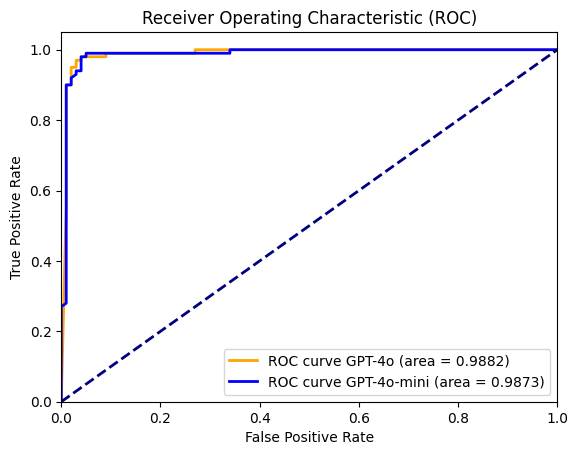

In [10]:
fpr_4o, tpr_4o, _ = roc_curve(df['Positive'], prob_gpt_4o['prob_positive'])
roc_auc_4o = auc(fpr_4o, tpr_4o)
fpr_4o_mini, tpr_4o_mini, _ = roc_curve(df['Positive'], prob_gpt_4o_mini['prob_positive'])
roc_auc_4o_mini = auc(fpr_4o_mini, tpr_4o_mini)

plt.figure()
plt.plot(fpr_4o, tpr_4o, color='orange',
lw=2, label='ROC curve GPT-4o (area = %0.4f)' % roc_auc_4o)
plt.plot(fpr_4o_mini, tpr_4o_mini, color='blue',
lw=2, label='ROC curve GPT-4o-mini (area = %0.4f)' % roc_auc_4o_mini)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 스트리밍

In [16]:
stream = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{
        "role": "user",
        "content": "5세 아이를 위한 20줄짜리 이야기를 작성해주세요."}],
    stream=True,
)
for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="")

C:\Users\campus3S043\AppData\Local\Temp\ipykernel_42584\2350813096.py:1: RuntimeWarning: coroutine 'AsyncCompletions.create' was never awaited
  stream = client.chat.completions.create(


옛날 옛적, 시골 마을에 작은 마법사 하나가 살았어요. 이름은 루루였죠. 루루는 친구들과 함께 놀기를 좋아했어요. 하지만, 루루는 특별한 능력을 가지고 있었어요. 바로 동물들과 대화할 수 있는 능력이었죠!

는 루루가 숲 속을 걷고 있었어요. 그때 갑자기 귀여운 다람쥐 한 마리가 뛰어왔어요. "루루, 도와줘! 나의 친구들이 숲 속에서 길을 잃었어요!" 다람쥐가 울먹였어요.

 다 함께 찾아보자!"라고 말했어요. 그러고는 다람쥐와 함께 숲 속으로 들어갔어요. 그곳에서 루루는 토끼, 새, 그리고 너구리를 만났어요.

 어디 갔어요?" 루루가 물었어요. 토끼가 고개를 숙이며 "우리는 나무 뒤에 술래잡기를 하다가 길을 잃었어요."라고 대답했어요.

펴보며 마법을 썼어요. "하늘에서 별들이 비추어 줄 거야!" 그러자 하늘에서 반짝이는 별들이 떨어져 내리며 길을 안내해 주었어요.

 별빛을 따라가자, 드디어 친구들을 찾을 수 있었어요! 루루는 반짝이는 별빛을 보며 외쳤어요. "여기야! 친구들이 기다리고 있어!"

 함께 숲 속에서 즐거운 시간을 보냈어요. 그날 이후로 루루는 친구들이 언제든지 필요할 때 도와주는 마법사로 더 사랑받게 되었답니다.

들과 함께 하는 것이 가장 소중하다는 것을 깨달았어요. 그들은 영원히 행복하게 살았답니다.

# 비동기처리
- 비동기 처리(Asynchronous Processing)는 작업들을 동시에 실행할 수 있게 해주는 프로그래밍
- 여러 작업이 서로 블로킹하지 않고 독립적으로 실행되어 전체 실행 시간을 단축
- Python에서는 `asyncio` 라이브러리를 통해 비동기 프로그래밍을 구현
    + 아침 식사를 준비하는 과정에서 커피를 내리면서 동시에 토스트를 굽는 것처럼 여러 작업을 병렬로 처리
    + 이는 각 작업이 서로를 기다리지 않고 독립적으로 실행되므로, 전체 소요 시간을 크게 단축

In [13]:
import asyncio

async def make_coffee():
    print("커피 내리기 시작...")
    await asyncio.sleep(2)  # 커피 내리는데 2초 걸린다고 가정
    print("커피가 완성되었습니다!")
    return "☕"

async def toast_bread():
    print("토스트 굽기 시작...")
    await asyncio.sleep(10)  # 토스트 굽는데 10초 걸린다고 가정
    print("토스트가 완성되었습니다!")
    return "🍞"

async def prepare_breakfast():
    # 동시에 커피와 토스트 준비
    coffee, toast = await asyncio.gather(make_coffee(), toast_bread())
    print(f"\n아침식사가 준비되었습니다! {coffee} {toast}")

# 실행
asyncio.run(prepare_breakfast())



커피 내리기 시작...
토스트 굽기 시작...
커피가 완성되었습니다!
토스트가 완성되었습니다!

아침식사가 준비되었습니다! ☕ 🍞


In [12]:
import asyncio
import time
import nest_asyncio
from openai import AsyncOpenAI

# Enable nested event loops
nest_asyncio.apply()

client = AsyncOpenAI(api_key=os.getenv('OPENAI_API_KEY'))

async def async_call():
    stream = await client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{
            "role": "user",
            "content": "5세 아이를 위한 20줄짜리 이야기를 작성해주세요."}],
        stream=True
    )

    async for chunk in stream:
        if chunk.choices[0].delta.content is not None:
            print(chunk.choices[0].delta.content, end="")

async def countdown():
    for i in range(10, 0, -1):
        print(f"\nCountdown: {i}")
        await asyncio.sleep(1)

async def main():
    await asyncio.gather(async_call(), countdown())

# Use asyncio.run() after enabling nested event loops
asyncio.run(main())


Countdown: 10
**바
Countdown: 9
람과 구름의 친구**

적, 푸른 하늘에 바람과 구름이 살고 있었어요. 바람은 날
Countdown: 8

Countdown: 7

Countdown: 6

Countdown: 5
쌔고, 구름은 부드러웠어요. 두 친구는 매일 함께 하늘을 날며 놀았답니다.

어느 날,
Countdown: 4
. "구름아, 우리 지구에 내려가서 친구들을 만나볼까?" 구름은 신나서 고개를 끄덕였어요. 그래서 두 친구는 하늘에서 내려가도록 결정했어요.

 내려가며 "슝!" 하고 소리쳤고, 구름은 "퐁!"
Countdown: 3
 반짝이며 인사를 했죠. "안녕하세요, 바람님! 우리도 함께 놀아요!"고

들과 함께 춤을 췄고, 구름은 꽃들 위에 은은한 비를 내렸어요. 꽃들은 기뻐하며 더욱 활짝 피어났답니다. "정말 신나!" 바람이 외쳤어요.

 저물어 갔어요. "우리는 다시 하늘로 돌아가야 해," 구름
Countdown: 2
그래도 친구들을 만났으니 행복해!"라고 대답했어요.

이라고 외쳤어요. 그리고 두 친구는 하늘로 날아올라, 다음 모험을 생각했답니다. 바람과 구름은 언제나 함께하는 소중한 친구들이었어요.

매일 하늘에서의 모험이 시작되었답니다.다렸어요. 그리고 매일
Countdown: 1


# 